In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp)
prcp_df

# Sort the dataframe by date
prcp_df.sort_values(by='date')
prcp_df



,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


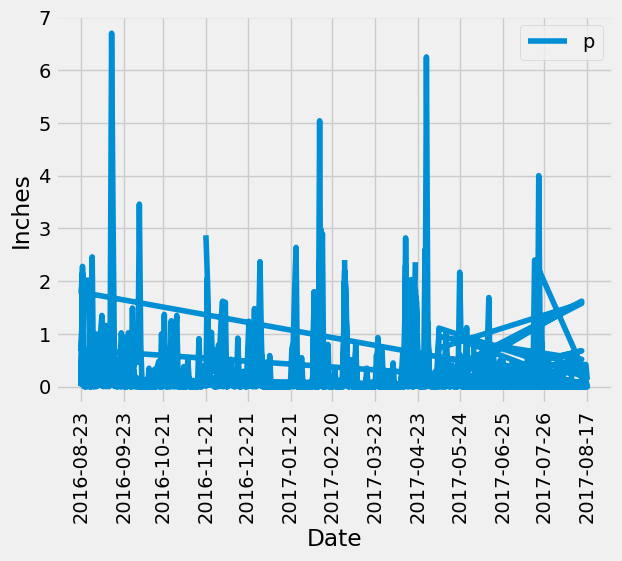

In [11]:
x_axis = prcp_df['date']
y_axis = prcp_df['prcp']
plt.plot(x_axis, y_axis)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend('precipitation', loc='upper right')
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))   # adjusts location of legend
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Shows ticks every month; added mdates import for this
plt.xticks(rotation=90)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)) \
                          .group_by(Measurement.station) \
                          .order_by(func.count(Measurement.station).desc()) \
                          .all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temperature_df = pd.DataFrame(most_active_temp)

lowest_temp = temperature_df['tobs'].min()
highest_temp = temperature_df['tobs'].max()
average_temp = temperature_df['tobs'].mean()
print("Lowest Temp:", lowest_temp)
print("Highest Temp:", highest_temp)
print("Average Temp:", average_temp)


Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp: 71.66378066378067


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date >= '2016-08-23')).all()
temp_data_df = pd.DataFrame(temp_data)
temp_data_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0, 0.5, 'Frequency')

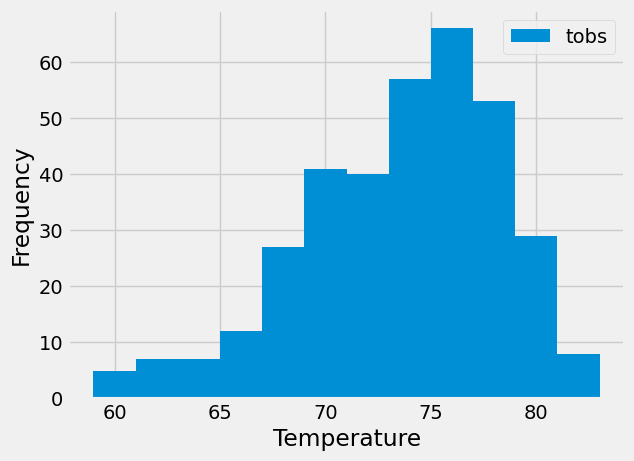

In [17]:
#plot the results as a histogram
temp_data_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [18]:
# Close Session
session.close()